## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def greedy_epsilon_policy(current_state, time_period):
    max_eps = 1.0
    min_eps = 0.0001

    eps = min_eps + (max_eps - min_eps) * np.exp(-0.000001*time_period)
    z = np.random.random()       
    if z > eps:
        action = max(Q_dict[Q_state(current_state)], key=Q_dict[Q_state(current_state)].get)
    else:
        action = random.sample(valid_actions(current_state),1)[0]   
    
    return action




#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
import collections
#Inititalise Q Dict
Q_dict = collections.defaultdict(dict)
#Initiailise the states tracked 
States_track = collections.defaultdict(dict)


print(len(Q_dict))
print(len(States_track))


0
0


In [7]:
# Initialise states to be tracked
def initialise_tracking_states():
    #Initialise the list of positions of the board and the list of next steps
    initial_q = [('x-x-7-x-x-x-x-x-2',(1,5)),
                 ('3-x-7-x-x-x-x-8-2',(5,5)),
                 ('1-x-3-x-6-x-x-4-x',(1,5)),
                 ('x-1-x-x-x-x-2-x-x',(2,3)),
                 ('x-x-x-x-x-x-x-x-x',(6,5)),
                 ('x-1-2-x-x-x-x-x-x',(3,3))]
    
    for q in initial_q:
        #Storing the state of the board
        state = q[0]
        #Storing what should be the next move.
        action = q[1]
        #Initialise the state and action matrix
        States_track[state][action] = []
  

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [11]:
episode_threshold = 1000000
EPISODES = 6000000
LR = 0.20
GAMMA = 0.8
threshold = 5000


### Q-update loop ---write your code here

In [12]:
from TCGame_Env import TicTacToe
from tqdm import tqdm
start_time = time.time()

q_value = {}
q_value['x-x-7-x-x-x-x-x-2'] = []
q_value['3-x-7-x-x-x-x-8-2'] = []
q_value['1-x-3-x-6-x-x-4-x'] = []
q_value['x-1-x-x-x-x-2-x-x'] = []
q_value['x-x-x-x-x-x-x-x-x'] = []
q_value['x-1-2-x-x-x-x-x-x'] = []



count_of_agent = 0
count_of_env = 0
count_of_ties = 0

for episode in tqdm(range(EPISODES)):
    ##### Start writing your code from the next line
    #Initialise the environment
    env = TicTacToe()
    #Initialise the reward to 0
    reward = 0
    #Initialise the total rewards to 0
    total_rewards = 0
    #Assign the terminal state to false to begin with
    terminal_state = False
    #Find the current state from the environemtn
    current_state = env.state
    add_to_dict(current_state)
    while not(terminal_state):
        #Use the greedy epsilon policy from current state and eposide
        current_action = greedy_epsilon_policy(current_state, episode)
        #Find the present Q State
        present_value = Q_state(current_state)
        #If the state is present in q _value array, append the action that needs to be performed
        if present_value in q_value.keys():
             q_value[present_value].append(current_action)
        #Move the state from current to the next state
        next_state,reward,terminal_state, result = env.step(current_state, current_action) 
        #Find the q state of the next step
        next_value = Q_state(next_state)
        if terminal_state:
            q_value_max = 0
            #Examine the result to determine who ha won the match.Agent or environment
            #If the result indicates, agent won the match, increment agent counter
            if result == "Game is won by the Agent":
                count_of_agent = count_of_agent + 1
            #If the result indicates, environment won the match, increment environment counter
            elif result == "Game is won by the Environment":
                count_of_env = count_of_env + 1
            #If the result indicates that it is a tie, increment tie counter
            else:
                count_of_ties = count_of_ties +  1
        else:
            add_to_dict(next_state)
            #Find what is the max of next balue
            max_next = max(Q_dict[next_value],key=Q_dict[next_value].get)
            q_value_max = Q_dict[next_value][max_next]

        Q_dict[present_value][current_action] += LR * ((reward + (GAMMA * (q_value_max))) - Q_dict[present_value][current_action]) 
        current_state = next_state
        #Update the total rewards with the reward option.
        total_rewards = total_rewards + reward

    #Printing the statistics for the gane as it was progressing.   
    if (episode + 1) % 500000 == 0:
        print("------------------------------------------------------------------------")
        print("Number of Episodes completed.  :", ((episode+1)/1000000), " million")
        print("Number of Matched Playes.      : ", episode + 1)
        print("Number of Times Environment Own: ", count_of_env /(episode + 1))
        print("Number of times Agent Won      : ", count_of_agent / (episode + 1))
        print("Number of times match is tied. : ", count_of_ties / (episode + 1))
        print("------------------------------------------------------------------------")
        

    if ((episode + 1) % threshold) == 0:   
        save_tracking_states()


                
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

  8%|▊         | 500330/6000000 [04:51<49:34, 1849.21it/s]  

------------------------------------------------------------------------
Number of Episodes completed.  : 0.5  million
Number of Matched Playes.      :  500000
Number of Times Environment Own:  0.300352
Number of times Agent Won      :  0.260016
Number of times match is tied. :  0.439632
------------------------------------------------------------------------


 17%|█▋        | 1000380/6000000 [08:53<36:56, 2255.34it/s] 

------------------------------------------------------------------------
Number of Episodes completed.  : 1.0  million
Number of Matched Playes.      :  1000000
Number of Times Environment Own:  0.277141
Number of times Agent Won      :  0.348139
Number of times match is tied. :  0.37472
------------------------------------------------------------------------


 25%|██▌       | 1500478/6000000 [12:17<28:37, 2619.42it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 1.5  million
Number of Matched Playes.      :  1500000
Number of Times Environment Own:  0.247888
Number of times Agent Won      :  0.4436326666666667
Number of times match is tied. :  0.3084793333333333
------------------------------------------------------------------------


 33%|███▎      | 2000340/6000000 [15:17<22:17, 2991.33it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 2.0  million
Number of Matched Playes.      :  2000000
Number of Times Environment Own:  0.221866
Number of times Agent Won      :  0.522377
Number of times match is tied. :  0.255757
------------------------------------------------------------------------


 42%|████▏     | 2500571/6000000 [18:00<18:48, 3100.14it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 2.5  million
Number of Matched Playes.      :  2500000
Number of Times Environment Own:  0.199956
Number of times Agent Won      :  0.5840844
Number of times match is tied. :  0.2159596
------------------------------------------------------------------------


 50%|█████     | 3000608/6000000 [20:37<15:27, 3235.15it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 3.0  million
Number of Matched Playes.      :  3000000
Number of Times Environment Own:  0.18238166666666666
Number of times Agent Won      :  0.631877
Number of times match is tied. :  0.18574133333333334
------------------------------------------------------------------------


 58%|█████▊    | 3500464/6000000 [23:09<13:00, 3200.71it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 3.5  million
Number of Matched Playes.      :  3500000
Number of Times Environment Own:  0.16780342857142858
Number of times Agent Won      :  0.6699845714285714
Number of times match is tied. :  0.162212
------------------------------------------------------------------------


 67%|██████▋   | 4000580/6000000 [25:39<10:02, 3316.41it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 4.0  million
Number of Matched Playes.      :  4000000
Number of Times Environment Own:  0.15579825
Number of times Agent Won      :  0.7005915
Number of times match is tied. :  0.14361025
------------------------------------------------------------------------


 75%|███████▌  | 4500432/6000000 [28:07<07:28, 3346.29it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 4.5  million
Number of Matched Playes.      :  4500000
Number of Times Environment Own:  0.14577333333333334
Number of times Agent Won      :  0.7255708888888889
Number of times match is tied. :  0.12865577777777779
------------------------------------------------------------------------


 83%|████████▎ | 5000492/6000000 [30:42<05:28, 3040.06it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 5.0  million
Number of Matched Playes.      :  5000000
Number of Times Environment Own:  0.1374558
Number of times Agent Won      :  0.7460984
Number of times match is tied. :  0.1164458
------------------------------------------------------------------------


 92%|█████████▏| 5500506/6000000 [33:31<02:38, 3156.62it/s]

------------------------------------------------------------------------
Number of Episodes completed.  : 5.5  million
Number of Matched Playes.      :  5500000
Number of Times Environment Own:  0.13039036363636364
Number of times Agent Won      :  0.7633261818181818
Number of times match is tied. :  0.10628345454545454
------------------------------------------------------------------------


100%|██████████| 6000000/6000000 [36:21<00:00, 2750.47it/s]


------------------------------------------------------------------------
Number of Episodes completed.  : 6.0  million
Number of Matched Playes.      :  6000000
Number of Times Environment Own:  0.124373
Number of times Agent Won      :  0.777909
Number of times match is tied. :  0.097718
------------------------------------------------------------------------


In [23]:
print(elapsed_time)

2181.4529111385345


/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Check the Q-dictionary

In [24]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): 3.5295131001481757,
              (0, 3): 3.0384432272940063,
              (0, 5): 3.0535741589271486,
              (0, 7): 3.668577007853571,
              (0, 9): 2.90698538775949,
              (1, 1): 1.8976127192344898,
              (1, 3): 2.075643603580385,
              (1, 5): 2.4089804566492568,
              (1, 7): 2.8811475072620016,
              (1, 9): 2.7105358736714447,
              (2, 1): 2.5908987110136064,
              (2, 3): 2.878029248933272,
              (2, 5): 4.064682906576377,
              (2, 7): 2.74229228708554,
              (2, 9): 3.451522457142893,
              (3, 1): 3.178160493803142,
              (3, 3): 3.0038161186129266,
              (3, 5): 3.033338648811252,
              (3, 7): 3.8517465529674833,
              (3, 9): 4.077424766686646,
              (4, 1): 3.0410557024582214,
              (4, 3): 2.9448297479229253,
              (4, 5): 2.6620675353006362,
       

In [25]:
len(Q_dict)

1209604

In [26]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

Q_dict['x-1-x-x-x-2-x-x-x']

{(0, 3): -0.5375538176,
 (0, 5): -0.1025950796231474,
 (0, 7): -0.27766417408,
 (0, 9): 4.2157534018932585,
 (2, 3): -0.70930065408,
 (2, 5): 0.7388365600312528,
 (2, 7): 1.3043738160070655,
 (2, 9): -0.29812603832893436,
 (3, 3): -0.5805623306874819,
 (3, 5): -0.050444799999999956,
 (3, 7): -0.7069140082324143,
 (3, 9): -0.22949755832893426,
 (4, 3): -0.53116193488896,
 (4, 5): 0.028719476736000282,
 (4, 7): -0.3875981614794585,
 (4, 9): -0.07225599999999993,
 (6, 3): -0.3089988214420143,
 (6, 5): -0.3607871116345344,
 (6, 7): 0.7755873280000001,
 (6, 9): -0.611280523264,
 (7, 3): -0.4441348186111999,
 (7, 5): -0.5801135254581843,
 (7, 7): -0.6360195348889599,
 (7, 9): -0.2636305093689344,
 (8, 3): -0.6518525023289343,
 (8, 5): -0.4693077108910142,
 (8, 7): -0.4492970074112,
 (8, 9): 1.7460692240746718}

#### Check the states tracked for Q-values convergence
(non-evaluative)

Text(0.5, 1.0, "(s,a)= 'x-x-7-x-x-x-x-x-2' (5,5)")

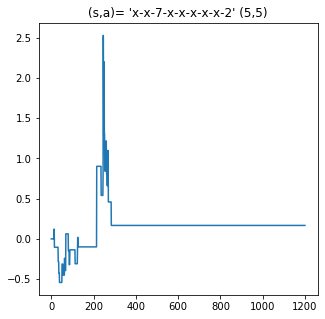

In [27]:
# Write the code for plotting the graphs for state-action pairs tracked
#Plotting x-x-7-x-x-x-x-x-2' (5,5) to check the state action pair graph
from matplotlib import pyplot as plt
plt.figure(0, figsize=(5,5))
plt.plot(np.asarray(range(0, len(States_track['x-x-7-x-x-x-x-x-2'][ (1,5)]))),np.asarray(States_track['x-x-7-x-x-x-x-x-2'][ (1,5)]))
plt.title("(s,a)= 'x-x-7-x-x-x-x-x-2' (5,5)")

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, "(s,a)= 'x-1-2-x-x-x-x-x-x' (3, 3)")

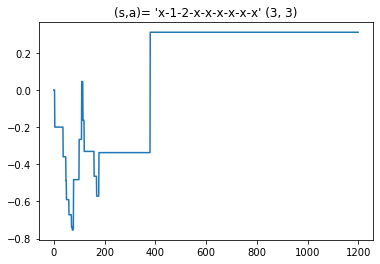

In [28]:
#Plotting x-1-2-x-x-x-x-x-x' (3, 3) to check the state action pair graph
temp = States_track['x-1-2-x-x-x-x-x-x'][ (3,3)]
plt.plot(np.asarray(range(0, len(temp))),np.asarray(temp))
plt.title("(s,a)= 'x-1-2-x-x-x-x-x-x' (3, 3)")

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, "(s,a)= 'x-x-x-x-x-x-x-x-x' (6, 5)")

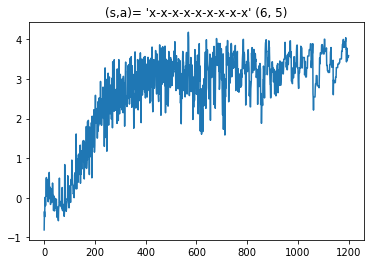

In [29]:
#Plotting x-x-x-x-x-x-x-x-x' (6, 5) to check the state action pair graph
temp = States_track['x-x-x-x-x-x-x-x-x'][ (6,5)]
plt.plot(np.asarray(range(0, len(temp))),np.asarray(temp))
plt.title("(s,a)= 'x-x-x-x-x-x-x-x-x' (6, 5)")

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, "(s,a)= 'x-1-x-x-x-x-2-x-x' (2, 3)")

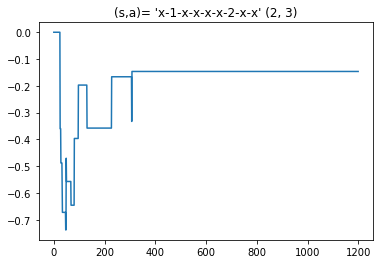

In [30]:
#Plotting x-1-x-x-x-x-2-x-x' (2, 3)to check the state action pair graph
temp = States_track['x-1-x-x-x-x-2-x-x'][ (2,3)]
plt.plot(np.asarray(range(0, len(temp))),np.asarray(temp))
plt.title("(s,a)= 'x-1-x-x-x-x-2-x-x' (2, 3)")

### Epsilon - decay check

In [31]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

/Users/jagannathan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


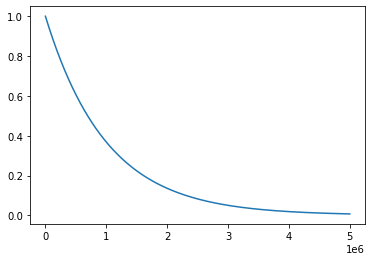

In [32]:
plt.plot(time, epsilon)
plt.show()